In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/h5-98cluster/H5_GisaidData.clustered.aligned.fasta


In [2]:
!pip install esm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.1 MB/s eta 0:00:00


In [3]:
import Bio.SeqIO
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import date
from Bio.Align import PairwiseAligner
from Bio.Data import CodonTable
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif

In [4]:
from huggingface_hub import login
from esm.models.esm3 import ESM3
from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig

In [5]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("ESM")
login(token=secret_value_0)
model: ESM3InferenceClient = ESM3.from_pretrained("esm3-open").to("cuda")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]

hyperplanes_8bit_58641.npz:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

data/entry_list_safety_29026.list:   0%|          | 0.00/1.60M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

data/ParentChildTreeFile.txt:   0%|          | 0.00/595k [00:00<?, ?B/s]

data/1utn.pdb:   0%|          | 0.00/569k [00:00<?, ?B/s]

data/esm3_entry.list:   0%|          | 0.00/1.93M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.30k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.00 [00:00<?, ?B/s]

hyperplanes_8bit_68103.npz:   0%|          | 0.00/34.9M [00:00<?, ?B/s]

keyword_idf_safety_filtered_58641.npy:   0%|          | 0.00/469k [00:00<?, ?B/s]

data/interpro2keywords.csv:   0%|          | 0.00/7.32M [00:00<?, ?B/s]

(…)ata/interpro_29026_to_keywords_58641.csv:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

(…)ord_vocabulary_safety_filtered_58641.txt:   0%|          | 0.00/788k [00:00<?, ?B/s]

data/keywords.txt:   0%|          | 0.00/788k [00:00<?, ?B/s]

data/tag_dict_4.json:   0%|          | 0.00/691k [00:00<?, ?B/s]

data/tag_dict_4_safety_filtered.json:   0%|          | 0.00/569k [00:00<?, ?B/s]

tfidf_safety_filtered_58641.pkl:   0%|          | 0.00/2.02M [00:00<?, ?B/s]

esm3_function_decoder_v0.pth:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

(…)0_residue_annotations_gt_1k_proteins.csv:   0%|          | 0.00/109k [00:00<?, ?B/s]

esm3_sm_open_v1.pth:   0%|          | 0.00/2.80G [00:00<?, ?B/s]

esm3_structure_decoder_v0.pth:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

esm3_structure_encoder_v0.pth:   0%|          | 0.00/62.3M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/esm/pretrained.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(


In [6]:
import os
import pandas as pd

# Path to your FASTA file
path = '/kaggle/input/h5-98cluster/H5_GisaidData.clustered.aligned.fasta'

# Initialize an empty list to store sequences
sequences = []

# Open the FASTA file and read sequences
with open(path, 'r') as file:
    sequence = ''
    for line in file:
        line = line.strip()
        if line.startswith('>'):
            if sequence:
                sequences.append(sequence)
                sequence = ''
        else:
            sequence += line
    if sequence:
        sequences.append(sequence)

print(f"Total sequences loaded: {len(sequences)}")



Total sequences loaded: 591


In [7]:
from transformers import EsmTokenizer, EsmModel
import torch

tokenizer = EsmTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")
model = EsmModel.from_pretrained("facebook/esm2_t6_8M_UR50D")

tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/31.4M [00:00<?, ?B/s]

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
# Initialize dictionary to store embeddings
embeddings = {}

# Loop over sequences and compute embeddings
for idx, seq in enumerate(sequences):
    # Tokenize the sequence
    inputs = tokenizer(seq, return_tensors="pt", padding=True, truncation=True)
    
    # Get model outputs
    outputs = model(**inputs)
    
    # Extract last hidden states and compute mean across tokens
    last_hidden_states = outputs.last_hidden_state
    x = last_hidden_states.detach()
    embedding = x.mean(axis=1)  # Average embedding for the sequence
    
    # Store embedding in dictionary with unique index
    embeddings[f'idx_{idx}'] = embedding

# embeddings dictionary now contains mean embeddings for each sequence

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [9]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout
from tensorflow.keras.layers import MultiHeadAttention, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2  # Import L2 regularizer
from sklearn.model_selection import train_test_split

# Assume embeddings is a dictionary: {sequence_id: embedding_array}
# Each embedding_array has shape (sequence_length, embedding_dim)

# Extract embeddings and pad sequences to the same length
embedding_list = []
sequence_ids = []
max_seq_length = 0

# Find the maximum sequence length
for seq_id, emb in embeddings.items():
    if emb.shape[0] > max_seq_length:
        max_seq_length = emb.shape[0]

# Pad embeddings to the maximum sequence length
for seq_id, emb in embeddings.items():
    seq_length, embedding_dim = emb.shape
    # Pad the sequence to max_seq_length
    pad_length = max_seq_length - seq_length
    if pad_length > 0:
        # Pad with zeros
        emb_padded = np.pad(emb, ((0, pad_length), (0, 0)), mode='constant', constant_values=0)
    else:
        emb_padded = emb
    embedding_list.append(emb_padded)
    sequence_ids.append(seq_id)

embedding_array = np.stack(embedding_list)  # Shape: (num_sequences, max_seq_length, embedding_dim)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Create sequence indices
sequence_indices = np.arange(embedding_array.shape[0])

# Perform the train/test split
train_indices, test_indices = train_test_split(
    sequence_indices,
    test_size=0.2,       # 20% of data for testing
    random_state=42,     # For reproducibility
    shuffle=True
)

# Split the embeddings
embedding_array_train = embedding_array[train_indices]
embedding_array_test = embedding_array[test_indices]

# Transformer parameters
embedding_dim = embedding_array.shape[2]
num_heads = 8
ff_dim = 256  # Feed-forward layer dimension
dropout_rate = 0.1
num_layers = 2  # Number of transformer blocks
l2_reg = 1e-5  # L2 regularization factor

# Input layer
inputs = Input(shape=(max_seq_length, embedding_dim))

# Add a Masking layer
x = layers.Masking(mask_value=0.0)(inputs)

# Positional Encoding Layer
class PositionalEncoding(Layer):
    def __init__(self, max_seq_len, embed_dim, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.max_seq_len = max_seq_len
        self.embed_dim = embed_dim
        self.pos_encoding = self.positional_encoding(max_seq_len, embed_dim)
        self.supports_masking = True  # Ensure masking is supported

    def get_angles(self, pos, i, embed_dim):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(embed_dim))
        return pos * angle_rates

    def positional_encoding(self, max_seq_len, embed_dim):
        angle_rads = self.get_angles(
            np.arange(max_seq_len)[:, np.newaxis],
            np.arange(embed_dim)[np.newaxis, :],
            embed_dim
        )

        # Apply sin to even indices
        sines = np.sin(angle_rads[:, 0::2])

        # Apply cos to odd indices
        cosines = np.cos(angle_rads[:, 1::2])

        pos_encoding = np.zeros(angle_rads.shape)
        pos_encoding[:, 0::2] = sines
        pos_encoding[:, 1::2] = cosines

        pos_encoding = pos_encoding[np.newaxis, ...]

        return tf.cast(pos_encoding, dtype=tf.float32)

    def call(self, inputs, mask=None):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

    def compute_mask(self, inputs, mask=None):
        return mask

# Add positional encoding
x = PositionalEncoding(max_seq_length, embedding_dim)(x)

# Transformer Encoder blocks
for _ in range(num_layers):
    # Multi-head attention with L2 regularization
    attn_output = MultiHeadAttention(
        num_heads=num_heads,
        key_dim=embedding_dim,
        kernel_regularizer=l2(l2_reg),
        bias_regularizer=l2(l2_reg),
    )(x, x, attention_mask=None)
    attn_output = Dropout(dropout_rate)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)

    # Feed-forward network with L2 regularization
    ffn_output = Dense(
        ff_dim,
        activation='relu',
        kernel_regularizer=l2(l2_reg),
        bias_regularizer=l2(l2_reg)
    )(out1)
    ffn_output = Dense(
        embedding_dim,
        kernel_regularizer=l2(l2_reg),
        bias_regularizer=l2(l2_reg)
    )(ffn_output)
    ffn_output = Dropout(dropout_rate)(ffn_output)
    x = LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

# Output layer with L2 regularization
outputs = Dense(
    embedding_dim,
    kernel_regularizer=l2(l2_reg),
    bias_regularizer=l2(l2_reg)
)(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()

# Compile the model with additional metrics
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training parameters
epochs = 64
batch_size = 32

# Prepare datasets
# Training dataset
dataset_train = tf.data.Dataset.from_tensor_slices((embedding_array_train, embedding_array_train))
dataset_train = dataset_train.shuffle(buffer_size=1024).batch(batch_size)

# Validation dataset
dataset_val = tf.data.Dataset.from_tensor_slices((embedding_array_test, embedding_array_test))
dataset_val = dataset_val.batch(batch_size)

# Train the model with validation data
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val
)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(dataset_val)
print(f'Test Loss (MSE): {test_loss:.6f}, Test MAE: {test_mae:.6f}')

# Compute reconstruction loss on test data
reconstructed_embeddings_test = model.predict(embedding_array_test)
reconstruction_loss_test = np.mean((embedding_array_test - reconstructed_embeddings_test) ** 2)
print(f'Test Reconstruction Loss: {reconstruction_loss_test:.6f}')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1, 320)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 1, 320)    │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking (Masking)   │ (None, 1, 320)    │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, 1)         │          0 │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encoding │ (None, 1, 320)    │          0 │ masking[0][0],    │
│ (PositionalEncodin… │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 320)    │  3,284,800 │ positional_encod… │
│ (MultiHeadAttentio… │                   │            │ positional_encod… │
│                     │                   │            │ any[0][0],        │
│                     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1, 320)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 1, 320)    │          0 │ positional_encod… │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 1, 320)    │        640 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1, 256)    │     82,176 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1, 320)    │     82,240 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1, 320)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 1, 320)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 320)    │        640 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 1, 320)    │  3,284,800 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 1, 320)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 1, 320)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 1, 320)    │        640 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 7,003,712 (26.72 MB)

 Trainable params: 7,003,712 (26.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/64


/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/ke

13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5679 - mae: 0.5272  

I0000 00:00:1731556791.333568      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 966ms/step - loss: 0.5144 - mae: 0.4953 - val_loss: 0.0492 - val_mae: 0.1229
Epoch 2/64
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0972 - mae: 0.2175 - val_loss: 0.0336 - val_mae: 0.0762
Epoch 3/64
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0811 - mae: 0.1939 - val_loss: 0.0323 - val_mae: 0.0685
Epoch 4/64
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0731 - mae: 0.1804 - val_loss: 0.0321 - val_mae: 0.0723
Epoch 5/64
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0653 - mae: 0.1672 - val_loss: 0.0316 - val_mae: 0.0700
Epoch 6/64
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0598 - mae: 0.1575 - val_loss: 0.0303 - val_mae: 0.0662
Epoch 7/64
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0566 - mae: 0.1514 - val_loss: 0.0301 - val_mae: 0.0666
Epoch 8/64
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0546 - mae: 0.1470 - val_loss: 0.0301 - val_mae: 0.0649
Epoch 9/64
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0516 - mae: 0.1409 -

/opt/conda/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step
Test Reconstruction Loss: 0.000902


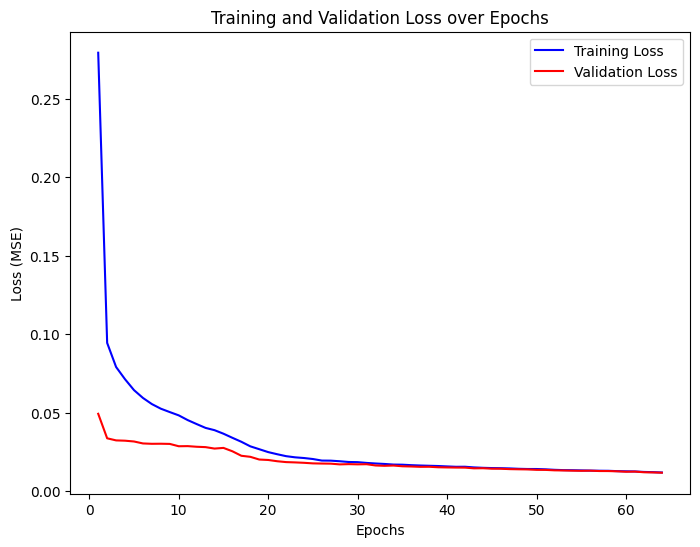

In [10]:
import matplotlib.pyplot as plt

# Access loss and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(loss) + 1)

# Plot Loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, loss, 'b-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()